## Appoach

* Loading Data

* Input and Output Data
* Applying Regular Expression
* Each word to lower case
* Splitting words to Tokenize
* Stemming with lemmatization handling Stop Words
* Vectorization
* Applying Classification

In [1]:
#importing Libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing data

df = pd.read_csv('SMSSpamCollection.csv',sep='\t',names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#shape
df.shape

(5572, 2)

In [4]:
#output count
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

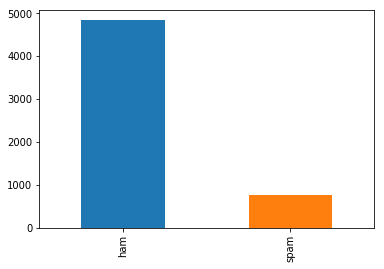

In [5]:
df['label'].value_counts().plot(kind='bar')

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
import re

In [7]:
corpus = []
for i in range(0,len(df)):
    review = re.sub('[^A-Za-z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [wl.lemmatize(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
#Vectorization

from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer()

## Model Creation & Prediction

In [9]:
X= cv.fit_transform(corpus).toarray()
y=pd.get_dummies(df['label'],drop_first=True)

In [10]:
#Split the data into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
#Use classification models

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [12]:
#Model fitting
mnb.fit(X_train,y_train)
y_predict = mnb.predict(X_test)

C:\Users\SOUVIK_ROY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
confusion_matrix(y_test,y_predict)

array([[1548,   45],
       [  10,  236]], dtype=int64)

In [15]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98      1593\n           1       0.84      0.96      0.90       246\n\n    accuracy                           0.97      1839\n   macro avg       0.92      0.97      0.94      1839\nweighted avg       0.97      0.97      0.97      1839\n'

In [16]:
accuracy_score(y_test,y_predict)*100

97.00924415443176